# Decision Tree

In [6]:
#!pip install pydotplus
#!pip install graphviz

In [1]:
import pandas as pd
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\GopiKrish\Anaconda3.7\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('iris.csv')
print(data.shape)
data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = data.iloc[:,:-1]
y = data.target
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
#Defining and fitting
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2,random_state=15)
model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=15, splitter='best')

In [25]:
#conda install python-graphviz

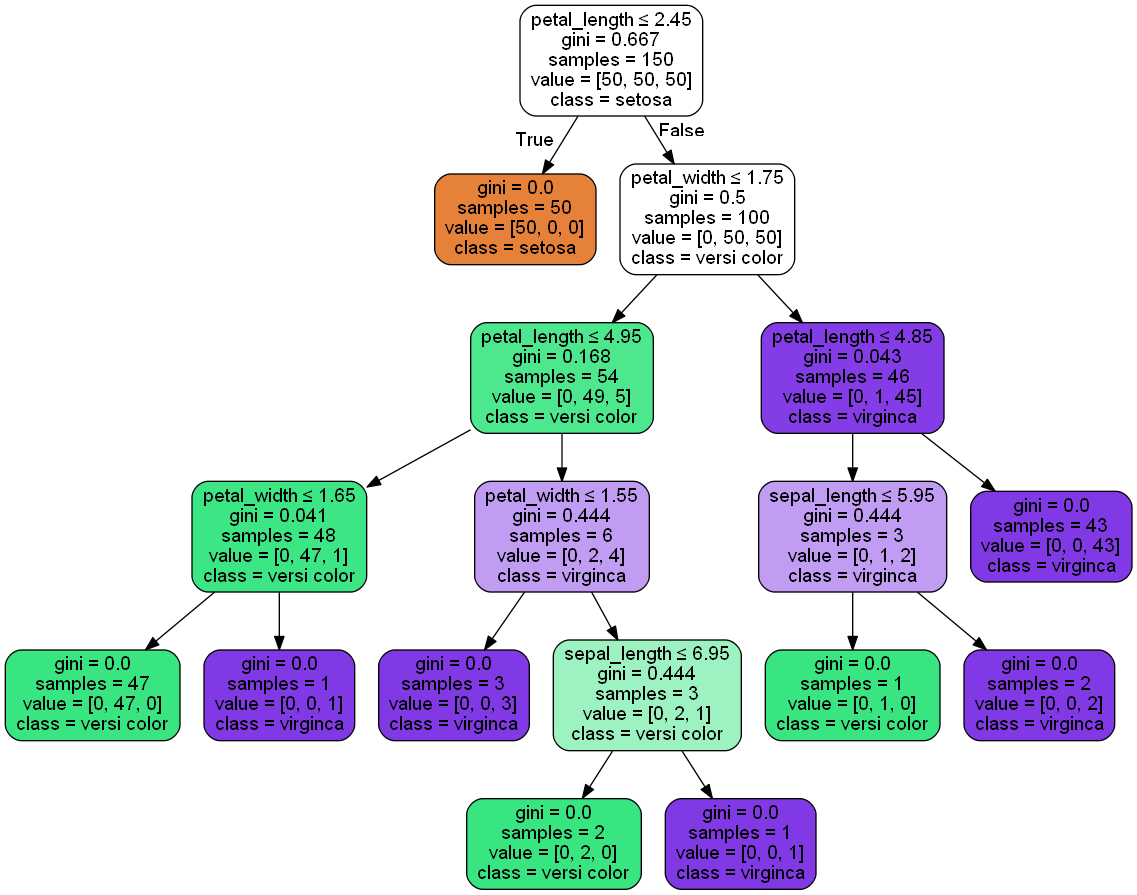

In [23]:
#Visualizing
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, 
                feature_names = X.columns,
                class_names=['setosa','versi color','virginca'],
                rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [27]:
#pd.DataFrame(model.features_importances_).sortvalues(0,ascending = True)

# Random Forest

In [39]:
import pandas as pd
data = pd.read_csv('breast_cancer.csv')
print(data.shape)
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [40]:
X = data.iloc[:,:-1]
y = data.outcome
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,
                            test_size=0.3,random_state=10)

In [93]:
#Defining and fitting
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=120,
                               max_features=30,
                               max_depth=7,
                               random_state=10,
                               criterion='gini')
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [94]:
# Testing Accuracy
y_predict_test = model.predict(X_test) # Prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict_test))
pd.crosstab(y_test, y_predict_test)

0.9824561403508771


col_0,0,1
outcome,,
0,59,0
1,3,109


In [55]:
# Training Accuracy
y_predict_train = model.predict(X_train) # Prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_predict_train))
pd.crosstab(y_train, y_predict_train)

1.0


col_0,0,1
outcome,,
0,153,0
1,0,245


# Bayes Theorem
- Thomas bayes

In [101]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [102]:
messages = ['call you tonight', 'Call me a cab', 'please call me.. please']

In [103]:
# instantiate CountVectorizer (vectorizer)
vect = CountVectorizer()
vect.fit(messages)
vect.get_feature_names() # unique words from text

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [173]:
# 1. Transform Messages

In [174]:
messages_transformed = vect.transform(messages)
print(messages)
print(vect.get_feature_names())
messages_transformed.toarray()

['call you tonight', 'Call me a cab', 'please call me.. please']
['cab', 'call', 'me', 'please', 'tonight', 'you']


array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [175]:
data = pd.DataFrame(messages_transformed.toarray())
data.columns = vect.get_feature_names()
print(messages)
data.head()

['call you tonight', 'Call me a cab', 'please call me.. please']


,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [176]:
data.loc[0,'outcome'] ='info'
data.loc[1,'outcome'] ='order'
data.loc[2,'outcome'] = "request"

In [108]:
data.head()

,cab,call,me,please,tonight,you,outcome
0,0,1,0,0,1,1,info
1,1,1,1,0,0,0,order
2,0,1,1,2,0,0,request


#### 2. Tfidf - Term frequency inverse document frequency
-This is done to remove most frequestly word in a text dataset

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect = TfidfVectorizer()
trans = tfvect.fit_transform(messages)
pd.DataFrame(trans.toarray(),columns=tfvect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


### Naive Bayes Classifiers

In [111]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [112]:
### Using Naive Bayes to predict spam
#Use Latin encoding as the Data has non UTF-8 Chars
data = pd.read_csv("spam.csv",encoding='latin-1')
print(data.shape)
data.head()

(5572, 2)


,type,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
data.email[23]

'Aft i finish my lunch then i go str down lor. Ard 3 smth lor. U finish ur lunch already?'

In [114]:
X =  data.email
y = data.type

## Vectorization : Transforming TEXT to Vectors

In [116]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)
feature_names = vectorizer.get_feature_names()

In [122]:
X = X.toarray()
X.shape

(5572, 8672)

In [123]:
y.shape

(5572,)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [125]:
#Fitting Naive Bayes algo
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
model = BernoulliNB(alpha=0.75)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9856459330143541
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1446
        spam       1.00      0.89      0.94       226

    accuracy                           0.99      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.99      0.99      0.99      1672



col_0,ham,spam
type,,
ham,1446,0
spam,24,202


##### Checking new email for spam

In [192]:
#NewEmail = pd.Series(["Hi team, We have meeting tomorrow"])
#NewEmail = pd.Series(['**FREE MESSAGE**Thanks for using the Auction Subscription Service. 18 . 150p/MSGRCVD 2 Skip an Auction txt OUT. 2 Unsubscribe txt STOP CustomerCare 08718726270'])
NewEmail = pd.Series(['Free prize Free Mobile - Free Moblie - Free Mobile!!!, 18RAM, 2.5 GHZ 20MP'])
NewEmail


0    Free prize Free Mobile - Free Moblie - Free Mo...
dtype: object

In [193]:
NewEmail_transformed = vectorizer.transform(NewEmail)
NewEmail_transformed.shape

(1, 8672)

In [194]:
model.predict(NewEmail_transformed)

array(['ham'], dtype='<U4')

In [195]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [198]:
#import scipy as sp
#-1*0.01*sp.log2(0.01)

In [199]:
#-1*0.4*sp.log2(0.6)

# Support Vector Machine (SVM)

In [234]:
data = pd.read_csv('breast_cancer.csv')
print(data.shape)
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [235]:
X = data.iloc[:,:-1]
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(X), columns=X.columns)
y = data.outcome
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [236]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,
                            test_size=0.3,random_state=10)

In [237]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',
            C=10,
            gamma = 0.0155,)
model.fit(X_train, y_train) # Training

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0155, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [238]:
# Testing Accuracy
y_predict_test = model.predict(X_test) # Prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict_test))
pd.crosstab(y_test, y_predict_test)

0.9883040935672515


col_0,0,1
outcome,,
0,59,0
1,2,110


In [239]:
# Training Accuracy
y_predict_train = model.predict(X_train) # Prediction
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_predict_train))
pd.crosstab(y_train, y_predict_train)

0.9874371859296482


col_0,0,1
outcome,,
0,148,5
1,0,245


In [240]:
# Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        59
           1       1.00      0.98      0.99       112

    accuracy                           0.99       171
   macro avg       0.98      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



# CAR Evalution
- KNN
- Random Forest
- SVM

In [2]:
import pandas as pd
data = pd.read_csv('car_evaluation.csv')
print(data.shape)
data.head(2)

(1728, 7)


,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc


In [3]:
from collections import Counter
Counter(data.outcome)

Counter({'unacc': 1210, 'acc': 384, 'vgood': 65, 'good': 69})

In [4]:
X = data.iloc[:,:-1]
y = data.outcome
from sklearn.preprocessing import LabelEncoder
enc_buy = LabelEncoder()
enc_maint = LabelEncoder()
enc_lug = LabelEncoder()
enc_safety = LabelEncoder()
X.buying = enc_buy.fit_transform(X.buying)
X.maint = enc_maint.fit_transform(X.maint)
X.lug_boot = enc_lug.fit_transform(X.lug_boot)
X.safety = enc_safety.fit_transform(X.safety)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## KNN Classifier

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.9566473988439307
              precision    recall  f1-score   support

         acc       0.89      0.91      0.90        64
        good       0.77      0.77      0.77        13
       unacc       0.98      0.99      0.99       251
       vgood       1.00      0.78      0.88        18

    accuracy                           0.96       346
   macro avg       0.91      0.86      0.88       346
weighted avg       0.96      0.96      0.96       346



col_0,acc,good,unacc,vgood
outcome,,,,
acc,58,1,5,0
good,3,10,0,0
unacc,2,0,249,0
vgood,2,2,0,14


## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=10,
                               random_state=10,
                               n_estimators=40,
                               max_features=3,
                               criterion='gini'
                              )
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
pd.crosstab(y_test, y_predict)

0.9942196531791907
              precision    recall  f1-score   support

         acc       0.97      1.00      0.98        64
        good       1.00      1.00      1.00        13
       unacc       1.00      1.00      1.00       251
       vgood       1.00      0.94      0.97        18

    accuracy                           0.99       346
   macro avg       0.99      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346



col_0,acc,good,unacc,vgood
outcome,,,,
acc,64,0,0,0
good,0,13,0,0
unacc,1,0,250,0
vgood,1,0,0,17


## svc

In [9]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',gamma=0.14,C=50)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))
pd.crosstab(y_test, y_predict)

1.0
              precision    recall  f1-score   support

         acc       1.00      1.00      1.00        64
        good       1.00      1.00      1.00        13
       unacc       1.00      1.00      1.00       251
       vgood       1.00      1.00      1.00        18

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346



col_0,acc,good,unacc,vgood
outcome,,,,
acc,64,0,0,0
good,0,13,0,0
unacc,0,0,251,0
vgood,0,0,0,18
